## Standardization StandardScaler

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_excel("loan_data_set.xlsx")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y


In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


In [27]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

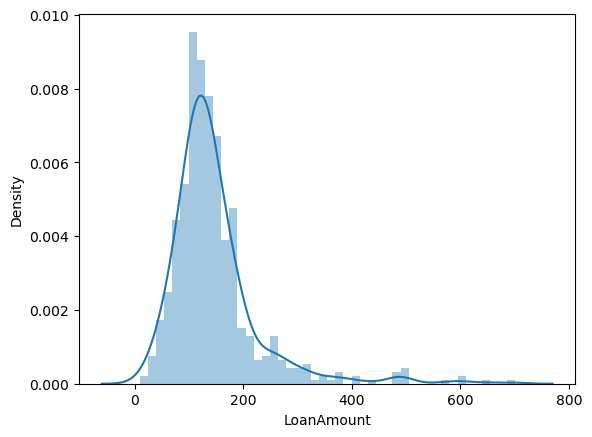

In [28]:
sns.distplot(df["LoanAmount"])
plt.show()

In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,6.140000e+02,614.000000,600.00000,564.000000
mean,5403.459283,1.868240e+07,146.412162,342.00000,0.842199
std,6109.041673,4.030156e+08,84.037468,65.12041,0.364878
min,150.000000,0.000000e+00,9.000000,12.00000,0.000000
25%,2877.500000,0.000000e+00,100.250000,360.00000,1.000000
50%,3812.500000,1.221000e+03,129.000000,360.00000,1.000000
75%,5795.000000,2.324000e+03,164.750000,360.00000,1.000000
max,81000.000000,9.858000e+09,700.000000,480.00000,1.000000


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()
ss.fit(df[["LoanAmount"]])

StandardScaler()

In [32]:
ss.transform(df[["LoanAmount"]])

array([[ 0.00000000e+00],
       [-2.19273315e-01],
       [-9.57640999e-01],
       [-3.14546564e-01],
       [-6.44542845e-02],
       [ 1.43609940e+00],
       [-6.12275469e-01],
       [ 1.38001371e-01],
       [ 2.57092933e-01],
       [ 2.41265020e+00],
       [-9.10004374e-01],
       [-4.45547283e-01],
       [ 6.38185931e-01],
       [-3.86001502e-01],
       [-1.54118965e+00],
       [-2.55000784e-01],
       [-5.52729688e-01],
       [-8.38549437e-01],
       [-1.59727534e-01],
       [-3.74092345e-01],
       [-5.05093063e-01],
       [ 2.00773889e+00],
       [-3.62183189e-01],
       [-4.09819814e-01],
       [ 5.46372774e-02],
       [ 5.31003525e-01],
       [-2.90728252e-01],
       [-4.33638126e-01],
       [-1.32682484e+00],
       [-3.14546564e-01],
       [ 6.50095087e-01],
       [-8.62367749e-01],
       [-4.81274751e-01],
       [-3.86001502e-01],
       [ 2.06728467e+00],
       [ 0.00000000e+00],
       [-5.52729688e-01],
       [-2.87268159e-02],
       [ 4.4

In [33]:
df["LoanAmount_ss"] = pd.DataFrame(ss.transform(df[["LoanAmount"]]),columns=["X"])

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_ss
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N,-0.219273
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y,-0.957641
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y,-0.314547
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y,-0.064454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71.000000,360.0,1.0,Rural,Y,-0.898095
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40.000000,180.0,1.0,Rural,Y,-1.267279
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253.000000,360.0,1.0,Urban,Y,1.269371
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187.000000,360.0,1.0,Urban,Y,0.483367


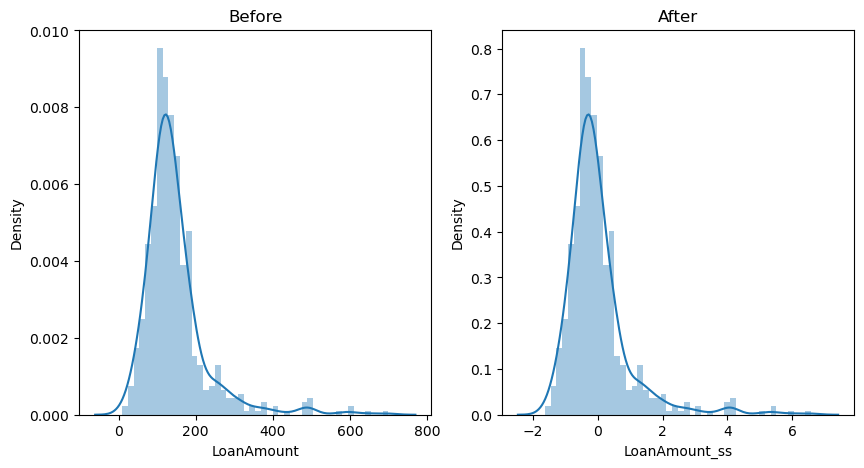

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["LoanAmount"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df["LoanAmount_ss"])
plt.show()

## Normalisation MinMaxScaler

In [38]:
df_mimax = pd.read_excel("loan_data_set.xlsx")
df_mimax.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y


In [39]:
df_mimax.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
df_mimax.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,6.140000e+02,592.000000,600.00000,564.000000
mean,5403.459283,1.868240e+07,146.412162,342.00000,0.842199
std,6109.041673,4.030156e+08,85.587325,65.12041,0.364878
min,150.000000,0.000000e+00,9.000000,12.00000,0.000000
25%,2877.500000,0.000000e+00,100.000000,360.00000,1.000000
50%,3812.500000,1.221000e+03,128.000000,360.00000,1.000000
75%,5795.000000,2.324000e+03,168.000000,360.00000,1.000000
max,81000.000000,9.858000e+09,700.000000,480.00000,1.000000


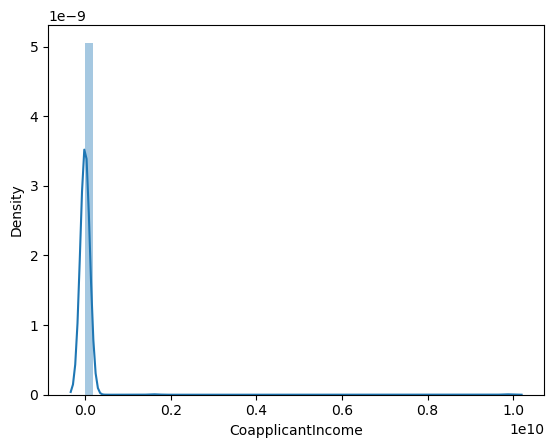

In [41]:
sns.distplot(df_mimax["CoapplicantIncome"])
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(df_mimax[["CoapplicantIncome"]])


MinMaxScaler()

In [44]:
df_mimax["CoapplicantIncome_Min_Max"] = ms.transform(df_mimax[["CoapplicantIncome"]])

In [45]:
df_mimax.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_Min_Max
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y,0.000000e+00
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N,1.529722e-07
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y,0.000000e+00
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y,2.391966e-07
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y,0.000000e+00


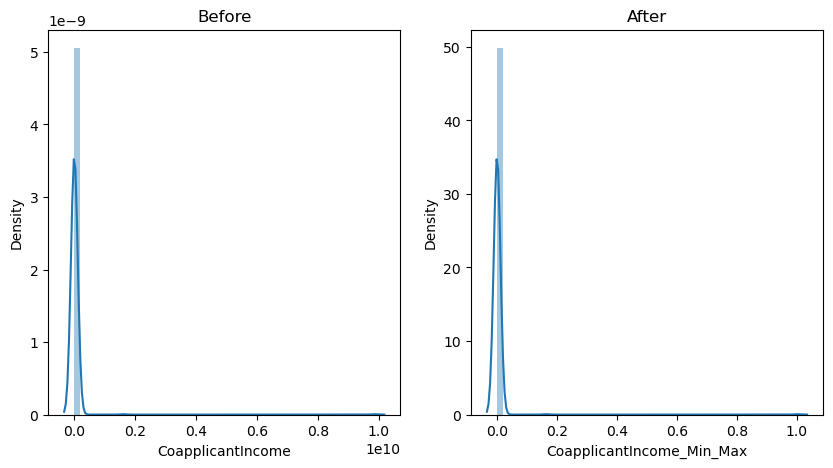

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df_mimax["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_mimax["CoapplicantIncome_Min_Max"])
plt.show()